In [118]:
import numpy as np
import matplotlib.pyplot as plt
import lab_utils_common as util
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('../deeplearning.mplstyle')

dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';

In [119]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2, 3.9])
y_train = np.array([250, 300, 480,  430,   630, 730,863])

In [120]:
# Loop version of multi-variable compute_cost
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    Returns
      cost (scalar)    : cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i],w) + b           #(n,)(n,)=scalar
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost 


def best_cost(x, y):
    w_range = np.array([200-200,200+200])
    tmp_b = 100

    w_array = np.arange(*w_range, 5)
    cost = np.zeros_like(w_array)
    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = util.compute_cost(x, y, tmp_w, tmp_b)

    return min(cost)

def compute_model_output(x,w,b):
    m = len(x_train)
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False
    for p in zip(x,y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color=dlpurple, ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color=dlpurple,
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(x))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15,0.02,cstr, transform=ax.transAxes, color=dlpurple)

def plt_house_x(X, y,f_wb=None, ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")

    ax.set_title("Housing Prices")
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel(f'Size (1000 sqft)')
    if f_wb is not None:
        ax.plot(X, f_wb,  c=dlblue, label="Our Prediction")
    ax.legend()


In [121]:
def plot_chart(x,y, title='Chart Title', xlabel='X', ylabel='Y'):
    w = 150
    b = 100
    tmp_f_wb = compute_model_output(x_train,w,b)

    # Plot prediction values 
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

    # Plot actual values 
    plt.scatter(x, y, marker='x', c='r',label='Actual Values')

    ax = plt.axes()
    
    mk_cost_lines(x, y, w, b, ax)

    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.legend(loc='upper center')
    plt.show()

In [122]:
def plot_chartA(x,y, title='Chart Title', xlabel='X', ylabel='Y'):
    w = 150
    tmp_b = 100
    tmp_f_wb = compute_model_output(x,w,tmp_b)

    w_range = np.array([200-200,200+200])

    w_array = np.arange(*w_range, 5)
    cost = np.zeros_like(w_array)
    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = compute_cost(x, y, tmp_w, tmp_b)

    f_wb = np.dot(x, w) + tmp_b
    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,4))
    fig.canvas.toolbar_position = 'bottom'

    mk_cost_lines(x, y, w, tmp_b, ax[0])
    plt_house_x(x, y, f_wb=f_wb, ax=ax[0])

    
    ax[1].plot(w_array, cost)
    cur_cost = compute_cost(x, y, w, tmp_b)

    ax[1].scatter(w,cur_cost, s=100, color=dldarkred, zorder= 10, label= f"cost at w={w}")
    ax[1].hlines(cur_cost, ax[1].get_xlim()[0],w, lw=4, color=dlpurple, ls='dotted')
    ax[1].vlines(w, ax[1].get_ylim()[0],cur_cost, lw=4, color=dlpurple, ls='dotted')
    ax[1].set_title("Cost vs. w, (b fixed at 100)")
    ax[1].set_ylabel('Cost')
    ax[1].set_xlabel('w')
    ax[1].legend(loc='upper center')
        
    fig.suptitle(f"Minimize Cost: Current Cost = {cur_cost:0.0f}", fontsize=12)
    
    plt.show()




XLength: 7
CostLength: 80
w=2405


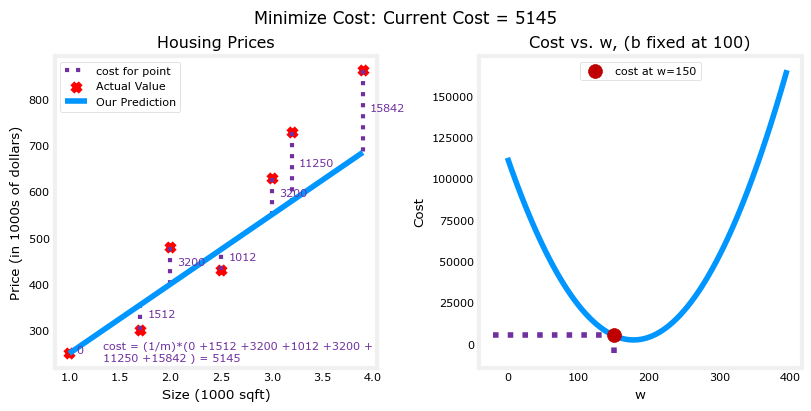

In [123]:
w = best_cost(x_train,y_train)
print(f"w={w}")

plot_chartA(x_train,y_train,'Housing Prices','Size (1000 sqft)','Price (in 1000s of dollars)')